#**IT-641 Deep Learning**

#**Lab 5**

#INSTRUCTIONS:

## 1. Introduction

## Time Series Forecasting

Time series forecasting means to forecast or to predict the future value over a period of
time.
 It entails developing models based on previous data and applying them to make
observations and guide future strategic decisions.




##2. Datasets

## Monthly ocean dataset

Global Temperature Time Series. Data are included from the GISS Surface Temperature
(GISTEMP) analysis and the global component of Climate at a Glance (GCAG). Two datasets
are provided: 1) global monthly mean and 2) annual mean temperature anomalies in
degrees Celsius from 1880 to the present.


## Electricity load forecasting
Time Series Forecasting Loading of Panama with reference to Weather Parameters &
Special Days. There are a total 15 features in this data set.

● 12 features are Numerical continuous values : Weather Parameters

● 03 nos. of parameters contains the details of the Special days (Holidays,
Holidays_ID, School days

● No null values in data sets
Output- To be predicted
Loading of the Panama in 'nat_demand' column




## 3. Tasks

For each of the above given dataset
1. Create train-test data from given datasets.
2. Select important features and create additional features from the given features.
3. Plot graphs for different variables with time on X-axis and variable on Y-axis.
4. Create and train LinearRegression, PolynomialRegression (with three different number of
polynomial features) and ANN model for both datasets.
5. Plot graphs showing the result for all the models.
6. Compare RMSE, MAE, MSE for the created models.
7. Compare the results and justify which one is better.
8. Try the above tasks taking different features





##4. Reference Code

https://colab.research.google.com/drive/1eqQA28isnDt54Bc70AsA6lKmxucJJeBS?usp=sharing

# **DATASET01 - Monthly ocean dataset**

#1. Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import simplefilter
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Input,Dropout
from tensorflow.keras.utils import to_categorical,plot_model
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neural_network import MLPRegressor
from math import sqrt

#2. Data Understanding

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Jatansahu/DEEP_LEARNING_ASSIGNMENTS/main/LAB_05/monthly_ocean_csv.csv')

In [ ]:
df = pd.DataFrame(df)
df

,Source,Date,Mean
0,GCAG,2016-12-06,0.7895
1,GISTEMP,2016-12-06,0.8100
2,GCAG,2016-11-06,0.7504
3,GISTEMP,2016-11-06,0.9300
4,GCAG,2016-10-06,0.7292
...,...,...,...
3283,GISTEMP,1880-03-06,-0.1800
3284,GCAG,1880-02-06,-0.1229
3285,GISTEMP,1880-02-06,-0.2100
3286,GCAG,1880-01-06,0.0009


Data Sources:

GISTEMP: GISTEMP is a temperature analysis produced by NASA's Goddard Institute for Space Studies (GISS). It primarily focuses on surface temperature measurements from weather stations, ships, buoys, and other sources around the world.


GCAG: GCAG, on the other hand, is a dataset maintained by the National Oceanic and Atmospheric Administration (NOAA) as part of its Climate at a Glance program. It provides a broader overview of climate conditions, including various climate indicators beyond just surface temperature.

In [ ]:
#Unique Values
df['Source'].unique()

array(['GCAG', 'GISTEMP'], dtype=object)

# Seprating Data Frames

In [ ]:
# Create new DataFrames for 'GCAG_Data' and 'GISTEMP_Data'
gcag_df = df[df['Source'] == 'GCAG'].copy()
gistemp_df = df[df['Source'] == 'GISTEMP'].copy()

In [ ]:
gcag_df

,Source,Date,Mean
0,GCAG,2016-12-06,0.7895
2,GCAG,2016-11-06,0.7504
4,GCAG,2016-10-06,0.7292
6,GCAG,2016-09-06,0.8767
8,GCAG,2016-08-06,0.8998
...,...,...,...
3278,GCAG,1880-05-06,-0.0738
3280,GCAG,1880-04-06,-0.0499
3282,GCAG,1880-03-06,-0.1357
3284,GCAG,1880-02-06,-0.1229


In [ ]:
gcag_df.info()
gistemp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1644 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Source  1644 non-null   object 
 1   Date    1644 non-null   object 
 2   Mean    1644 non-null   float64
dtypes: float64(1), object(2)
memory usage: 51.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1644 entries, 1 to 3287
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Source  1644 non-null   object 
 1   Date    1644 non-null   object 
 2   Mean    1644 non-null   float64
dtypes: float64(1), object(2)
memory usage: 51.4+ KB


In [ ]:
gcag_df.describe()


,Mean
count,1644.000000
mean,0.048797
std,0.326230
min,-0.679600
25%,-0.190625
50%,-0.021650
75%,0.252150
max,1.224500


In [ ]:
gistemp_df.describe()

,Mean
count,1644.000000
mean,0.024380
std,0.343709
min,-0.780000
25%,-0.230000
50%,-0.050000
75%,0.230000
max,1.350000


(array([ 25., 147., 440., 409., 233., 161., 128.,  80.,  16.,   5.]),
 array([-0.6796 , -0.48919, -0.29878, -0.10837,  0.08204,  0.27245,
         0.46286,  0.65327,  0.84368,  1.03409,  1.2245 ]),
 <BarContainer object of 10 artists>)

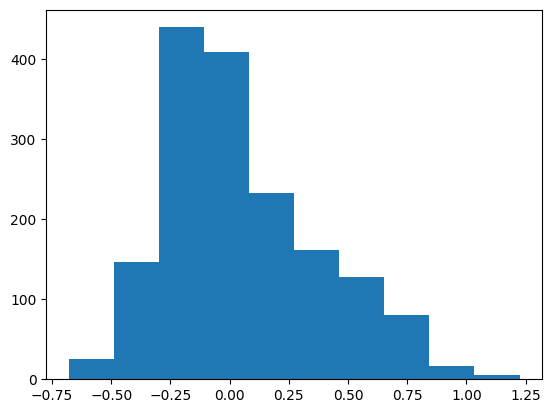

In [ ]:
plt.hist(gcag_df['Mean'])

(array([ 15., 146., 448., 440., 232., 155., 140.,  57.,   8.,   3.]),
 array([-0.78 , -0.567, -0.354, -0.141,  0.072,  0.285,  0.498,  0.711,
         0.924,  1.137,  1.35 ]),
 <BarContainer object of 10 artists>)

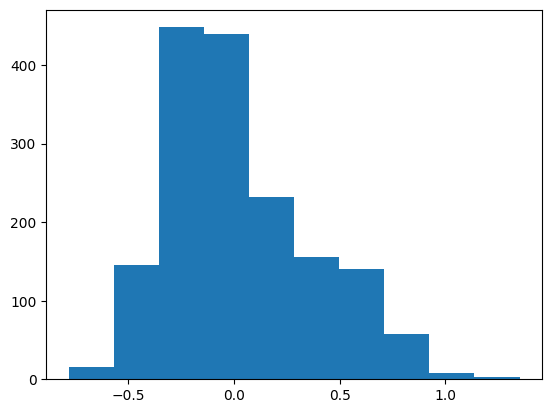

In [ ]:
plt.hist(gistemp_df['Mean'])

Right skewed

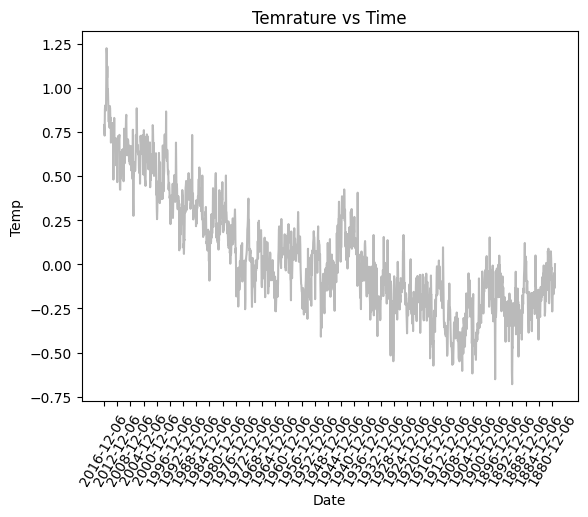

In [ ]:
#FOR GCAG
fig, ax = plt.subplots()
ax.plot(gcag_df['Date'], gcag_df['Mean'], color='darkgray', alpha=0.8,
        label='Temperature')
ax.set_xlabel('Date')
ax.set_ylabel('Temp')
ax.set_title('Temrature vs Time')
ax.set_xticks([i for i in list(gcag_df['Date'])[::48]])
plt.xticks(rotation = 60)
plt.show()

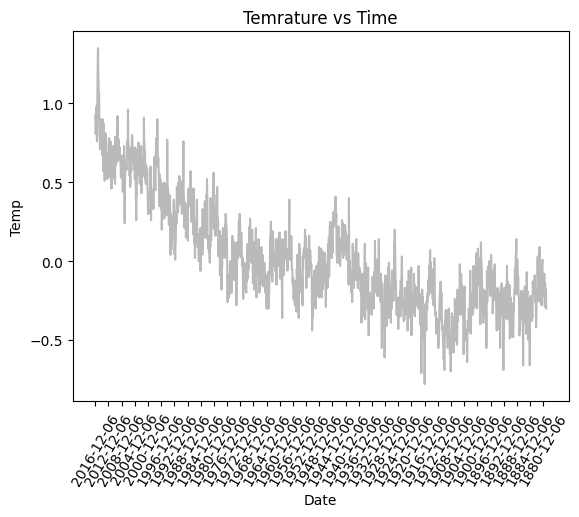

In [ ]:
#FOR gistemp
fig, ax = plt.subplots()
ax.plot(gistemp_df['Date'], gistemp_df['Mean'], color='darkgray', alpha=0.8,
        label='Temperature')
ax.set_xlabel('Date')
ax.set_ylabel('Temp')
ax.set_title('Temrature vs Time')
ax.set_xticks([i for i in list(gistemp_df['Date'])[::48]])
plt.xticks(rotation = 60)
plt.show()

# TASK 1-3

Task 1,2,3

1. Create train-test data from given datasets.
2. Select important features and create additional features from the given features.
3. Plot graphs for different variables with time on X-axis and variable on Y-axis.

#Lag Feature

In [ ]:
gcag_df['Lag_1'] = gcag_df['Mean'].shift(1)
gcag_df = gcag_df.reindex(columns=['Mean', 'Lag_1'])
gcag_df.head()

,Mean,Lag_1
0,0.7895,NaN
2,0.7504,0.7895
4,0.7292,0.7504
6,0.8767,0.7292
8,0.8998,0.8767


In [ ]:
gcag_df = gcag_df.iloc[1:,:]
gcag_df.head()

,Mean,Lag_1
2,0.7504,0.7895
4,0.7292,0.7504
6,0.8767,0.7292
8,0.8998,0.8767
10,0.8687,0.8998


In [ ]:
gistemp_df['Lag_1'] = gistemp_df['Mean'].shift(1)
gistemp_df = gistemp_df.reindex(columns=['Mean', 'Lag_1'])
gistemp_df.head()

,Mean,Lag_1
1,0.81,NaN
3,0.93,0.81
5,0.89,0.93
7,0.87,0.89
9,0.98,0.87


In [ ]:
gistemp_df = gistemp_df.iloc[1:,:]
gistemp_df.head()

,Mean,Lag_1
3,0.93,0.81
5,0.89,0.93
7,0.87,0.89
9,0.98,0.87
11,0.83,0.98


In [ ]:
# Linear Regression
# target = weight * lag + bias

X_gcag = gcag_df.loc[:, 'Lag_1']
# X_gcag.dropna(inplace=True)
y_gcag = gcag_df.loc[:, 'Mean']
# y_gcag, X_gcag = y_gcag.align(X_gcag, join='inner')

In [ ]:
X_gcag.head(3)

2    0.7895
4    0.7504
6    0.7292
Name: Lag_1, dtype: float64

In [ ]:
y_gcag.head(3)

2    0.7504
4    0.7292
6    0.8767
Name: Mean, dtype: float64

In [ ]:
# Linear Regression
# target = weight * lag + bias

X_gistemp = gistemp_df.loc[:, 'Lag_1']
# X_gistemp.dropna(inplace=True)
y_gistemp = gistemp_df.loc[:, 'Mean']
# y_gistemp, X_gistemp = y_gistemp.align(X_gistemp, join='inner')

In [ ]:
X_gistemp.head(3)

3    0.81
5    0.93
7    0.89
Name: Lag_1, dtype: float64

In [ ]:
y_gistemp.head(3)
# y_gistemp = pd.DataFrame(y_gistemp)

3    0.93
5    0.89
7    0.87
Name: Mean, dtype: float64

# FOR GCAG DATASET

In [ ]:
# y_gcag = pd.DataFrame(y_gcag)

y_gcag

2       0.7504
4       0.7292
6       0.8767
8       0.8998
10      0.8687
         ...  
3278   -0.0738
3280   -0.0499
3282   -0.1357
3284   -0.1229
3286    0.0009
Name: Mean, Length: 1643, dtype: float64

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_gcag, y_gcag,
                                                    test_size=0.2, shuffle=False)
X_train = np.array(X_train).reshape(-1, 1)
y_train = list(y_train)
X_test = np.array(X_test).reshape(-1, 1)
y_test = list(y_test)

## TASK 4 Model train

4. Create and train LinearRegression, PolynomialRegression (with three different number of
polynomial features) and ANN model for both datasets.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Reshape data to match model input requirements
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train)  # Convert y_train to a NumPy array
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test)  # Convert y_test to a NumPy array

In [ ]:
#Checking which degree is working best
poly = PolynomialFeatures(2)
new_x = poly.fit_transform(X_train)

model = LinearRegression()
model.fit(new_x, y_train)

new_x = poly.fit_transform(X_test)

y_pred = pd.Series(model.predict(new_x))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

0.10546106240008112

In [ ]:
poly = PolynomialFeatures(3)
new_x = poly.fit_transform(X_train)

model = LinearRegression()
model.fit(new_x, y_train)

new_x = poly.fit_transform(X_test)

y_pred = pd.Series(model.predict(new_x))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

0.1036086316284725

In [ ]:
poly = PolynomialFeatures(4)
new_x = poly.fit_transform(X_train)

model = LinearRegression()
model.fit(new_x, y_train)

new_x = poly.fit_transform(X_test)

y_pred = pd.Series(model.predict(new_x))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

0.10337531742011694

In [ ]:
poly = PolynomialFeatures(5)
new_x = poly.fit_transform(X_train)

model = LinearRegression()
model.fit(new_x, y_train)

new_x = poly.fit_transform(X_test)

y_pred = pd.Series(model.predict(new_x))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

0.10374590743924872

**WE WILL TAKE DEGREE - 4**

In [ ]:
# Create and train Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Create and train Polynomial Regression models with different degrees
poly_degrees = [4]
poly_reg_models = []


for degree in poly_degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    poly_reg_model = LinearRegression()
    poly_reg_model.fit(X_train_poly, y_train)

    poly_reg_models.append((degree, poly_reg_model))

# Create and train an Artificial Neural Network (ANN) model
ann_model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(1,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer
])

# Compile the ANN model
ann_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the ANN model
ann_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
33/33 [==============================] - 1s 9ms/step - loss: 0.0355 - val_loss: 0.0169
Epoch 2/100
33/33 [==============================] - 0s 3ms/step - loss: 0.0107 - val_loss: 0.0241
Epoch 3/100
33/33 [==============================] - 0s 3ms/step - loss: 0.0103 - val_loss: 0.0232
Epoch 4/100
33/33 [==============================] - 0s 3ms/step - loss: 0.0102 - val_loss: 0.0226
Epoch 5/100
33/33 [==============================] - 0s 3ms/step - loss: 0.0103 - val_loss: 0.0177
Epoch 6/100
33/33 [==============================] - 0s 3ms/step - loss: 0.0101 - val_loss: 0.0191
Epoch 7/100
33/33 [==============================] - 0s 3ms/step - loss: 0.0101 - val_loss: 0.0187
Epoch 8/100
33/33 [==============================] - 0s 4ms/step - loss: 0.0102 - val_loss: 0.0180
Epoch 9/100
33/33 [==============================] - 0s 3ms/step - loss: 0.0102 - val_loss: 0.0202
Epoch 10/100
33/33 [==============================] - 0s 4ms/step - loss: 0.0102 - val_loss: 0.0189
Epoch 11/

# Task5. Plot graphs showing the result for all the models.

11/11 [==============================] - 0s 2ms/step


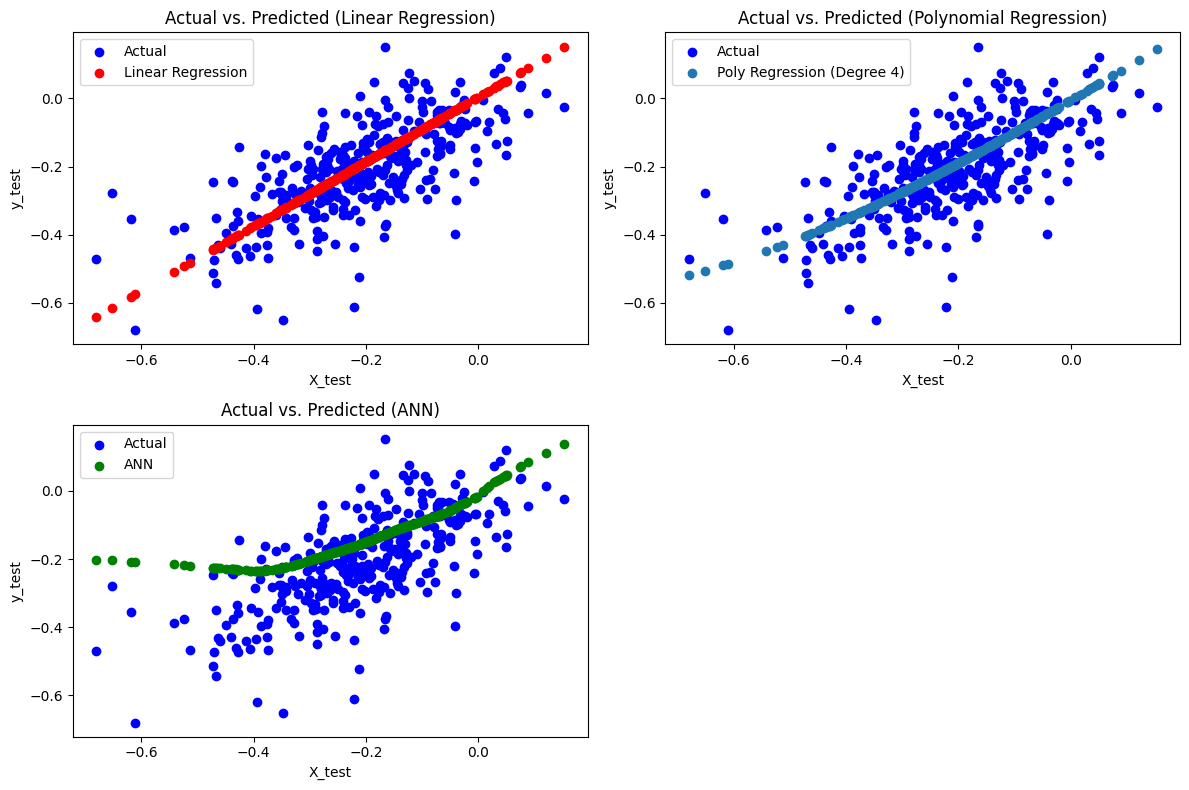

In [ ]:
# Predictions for all models
linear_reg_preds = linear_reg_model.predict(X_test)
poly_reg_preds = [poly_reg_model.predict(poly_features.transform(X_test)) for _, poly_reg_model in poly_reg_models]
ann_preds = ann_model.predict(X_test)

# Plotting the results
plt.figure(figsize=(12, 8))

# Actual vs. Predicted for Linear Regression
plt.subplot(2, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, linear_reg_preds, color='red', label='Linear Regression')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.title('Actual vs. Predicted (Linear Regression)')
plt.legend()

# Actual vs. Predicted for Polynomial Regression
plt.subplot(2, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='Actual')
for degree, poly_reg_model in poly_reg_models:
    plt.scatter(X_test, poly_reg_model.predict(poly_features.transform(X_test)), label=f'Poly Regression (Degree {degree})')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.title('Actual vs. Predicted (Polynomial Regression)')
plt.legend()

# Actual vs. Predicted for ANN
plt.subplot(2, 2, 3)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, ann_preds, color='green', label='ANN')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.title('Actual vs. Predicted (ANN)')
plt.legend()

plt.tight_layout()
plt.show()



#6. Compare RMSE, MAE, MSE for the created models.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Function to calculate RMSE, MAE, and MSE
def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    return rmse, mae, mse

# Calculate metrics for Linear Regression
linear_reg_rmse, linear_reg_mae, linear_reg_mse = calculate_metrics(y_test, linear_reg_preds)

# Calculate metrics for Polynomial Regression models
poly_reg_metrics = []
for degree, poly_reg_model in poly_reg_models:
    poly_reg_preds = poly_reg_model.predict(poly_features.transform(X_test))
    rmse, mae, mse = calculate_metrics(y_test, poly_reg_preds)
    poly_reg_metrics.append((degree, rmse, mae, mse))

# Calculate metrics for ANN
ann_rmse, ann_mae, ann_mse = calculate_metrics(y_test, ann_preds)

# Print and compare metrics
print(f"Linear Regression - RMSE: {linear_reg_rmse}, MAE: {linear_reg_mae}, MSE: {linear_reg_mse}")

for degree, rmse, mae, mse in poly_reg_metrics:
    print(f"Polynomial Regression (Degree {degree}) - RMSE: {rmse}, MAE: {mae}, MSE: {mse}")

print(f"ANN - RMSE: {ann_rmse}, MAE: {ann_mae}, MSE: {ann_mse}")


Linear Regression - RMSE: 0.10685999521568819, MAE: 0.08251771071017241, MSE: 0.011419058577496902
Polynomial Regression (Degree 4) - RMSE: 0.10337531742011694, MAE: 0.08009041191718375, MSE: 0.010686456251709931
ANN - RMSE: 0.12506471580165127, MAE: 0.0958508650961165, MSE: 0.0156411831385478


#7 Compare the results and justify which one is better.

Polynomial regression with degree= 4 will works better in this as it gives us less error in other cases. Data is non linear in this case.

#FOR GISTEMP DATASET

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_gistemp, y_gistemp,
                                                    test_size=0.2, shuffle=False)
X_train = np.array(X_train).reshape(-1, 1)
y_train = list(y_train)
X_test = np.array(X_test).reshape(-1, 1)
y_test = list(y_test)

#TASK 4 Model train

4. Create and train LinearRegression, PolynomialRegression (with three different number of
polynomial features) and ANN model for both datasets.

In [ ]:
# Reshape data to match model input requirements
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train)  # Convert y_train to a NumPy array
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test)  # Convert y_test to a NumPy array

In [ ]:
#Checking which degree is working best
poly = PolynomialFeatures(2)
new_x = poly.fit_transform(X_train)

model = LinearRegression()
model.fit(new_x, y_train)

new_x = poly.fit_transform(X_test)

y_pred = pd.Series(model.predict(new_x))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

0.12426652001566257

In [ ]:
#Checking which degree is working best
poly = PolynomialFeatures(3)
new_x = poly.fit_transform(X_train)

model = LinearRegression()
model.fit(new_x, y_train)

new_x = poly.fit_transform(X_test)

y_pred = pd.Series(model.predict(new_x))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

0.12149788572830693

In [ ]:
#Checking which degree is working best
poly = PolynomialFeatures(4)
new_x = poly.fit_transform(X_train)

model = LinearRegression()
model.fit(new_x, y_train)

new_x = poly.fit_transform(X_test)

y_pred = pd.Series(model.predict(new_x))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

0.1209652282880449

In [ ]:
#Checking which degree is working best
poly = PolynomialFeatures(5)
new_x = poly.fit_transform(X_train)

model = LinearRegression()
model.fit(new_x, y_train)

new_x = poly.fit_transform(X_test)

y_pred = pd.Series(model.predict(new_x))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

0.12095827506545165

In [ ]:
#Checking which degree is working best
poly = PolynomialFeatures(6)
new_x = poly.fit_transform(X_train)

model = LinearRegression()
model.fit(new_x, y_train)

new_x = poly.fit_transform(X_test)

y_pred = pd.Series(model.predict(new_x))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

0.12162328362286128

**In this dataset degree 5 works well we will do further for degree 5**

In [ ]:
# Create and train Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Create and train Polynomial Regression models with different degrees
poly_degrees = [5]
poly_reg_models = []


for degree in poly_degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    poly_reg_model = LinearRegression()
    poly_reg_model.fit(X_train_poly, y_train)

    poly_reg_models.append((degree, poly_reg_model))

# Create and train an Artificial Neural Network (ANN) model
ann_model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(1,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer
])

# Compile the ANN model
ann_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the ANN model
ann_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
33/33 [==============================] - 1s 7ms/step - loss: 0.0790 - val_loss: 0.0220
Epoch 2/100
33/33 [==============================] - 0s 4ms/step - loss: 0.0228 - val_loss: 0.0178
Epoch 3/100
33/33 [==============================] - 0s 3ms/step - loss: 0.0145 - val_loss: 0.0260
Epoch 4/100
33/33 [==============================] - 0s 3ms/step - loss: 0.0141 - val_loss: 0.0255
Epoch 5/100
33/33 [==============================] - 0s 3ms/step - loss: 0.0141 - val_loss: 0.0269
Epoch 6/100
33/33 [==============================] - 0s 3ms/step - loss: 0.0141 - val_loss: 0.0209
Epoch 7/100
33/33 [==============================] - 0s 4ms/step - loss: 0.0142 - val_loss: 0.0261
Epoch 8/100
33/33 [==============================] - 0s 3ms/step - loss: 0.0141 - val_loss: 0.0219
Epoch 9/100
33/33 [==============================] - 0s 3ms/step - loss: 0.0140 - val_loss: 0.0236
Epoch 10/100
33/33 [==============================] - 0s 4ms/step - loss: 0.0141 - val_loss: 0.0319
Epoch 11/

#Task5. Plot graphs showing the result for all the models.

11/11 [==============================] - 0s 2ms/step


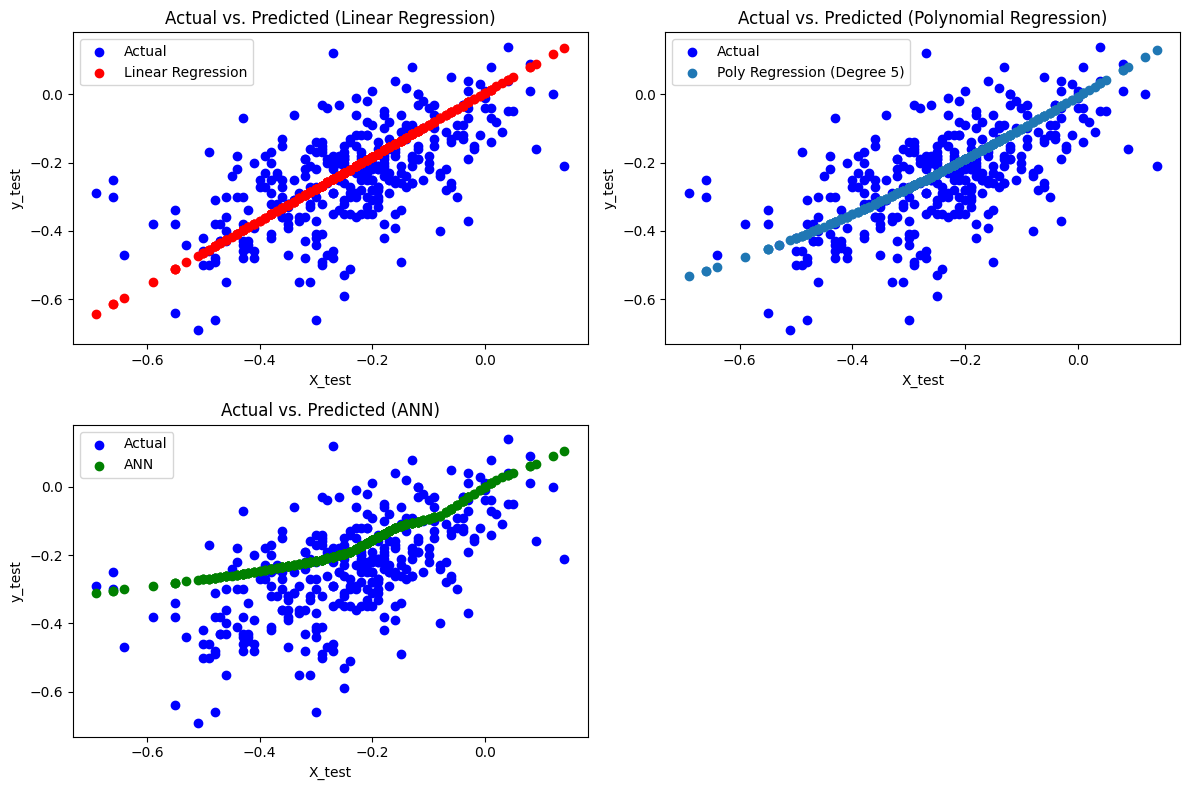

In [ ]:
import matplotlib.pyplot as plt

# Predictions for all models
linear_reg_preds = linear_reg_model.predict(X_test)
poly_reg_preds = [poly_reg_model.predict(poly_features.transform(X_test)) for _, poly_reg_model in poly_reg_models]
ann_preds = ann_model.predict(X_test)

# Plotting the results
plt.figure(figsize=(12, 8))

# Actual vs. Predicted for Linear Regression
plt.subplot(2, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, linear_reg_preds, color='red', label='Linear Regression')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.title('Actual vs. Predicted (Linear Regression)')
plt.legend()

# Actual vs. Predicted for Polynomial Regression
plt.subplot(2, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='Actual')
for degree, poly_reg_model in poly_reg_models:
    plt.scatter(X_test, poly_reg_model.predict(poly_features.transform(X_test)), label=f'Poly Regression (Degree {degree})')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.title('Actual vs. Predicted (Polynomial Regression)')
plt.legend()

# Actual vs. Predicted for ANN
plt.subplot(2, 2, 3)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, ann_preds, color='green', label='ANN')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.title('Actual vs. Predicted (ANN)')
plt.legend()

plt.tight_layout()
plt.show()


#TASK6. Compare RMSE, MAE, MSE for the created models.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Function to calculate RMSE, MAE, and MSE
def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    return rmse, mae, mse

# Calculate metrics for Linear Regression
linear_reg_rmse, linear_reg_mae, linear_reg_mse = calculate_metrics(y_test, linear_reg_preds)

# Calculate metrics for Polynomial Regression models
poly_reg_metrics = []
for degree, poly_reg_model in poly_reg_models:
    poly_reg_preds = poly_reg_model.predict(poly_features.transform(X_test))
    rmse, mae, mse = calculate_metrics(y_test, poly_reg_preds)
    poly_reg_metrics.append((degree, rmse, mae, mse))

# Calculate metrics for ANN
ann_rmse, ann_mae, ann_mse = calculate_metrics(y_test, ann_preds)

# Print and compare metrics
print(f"Linear Regression - RMSE: {linear_reg_rmse}, MAE: {linear_reg_mae}, MSE: {linear_reg_mse}")

for degree, rmse, mae, mse in poly_reg_metrics:
    print(f"Polynomial Regression (Degree {degree}) - RMSE: {rmse}, MAE: {mae}, MSE: {mse}")

print(f"ANN - RMSE: {ann_rmse}, MAE: {ann_mae}, MSE: {ann_mse}")

Linear Regression - RMSE: 0.12634578473993902, MAE: 0.09770004663970339, MSE: 0.015963257321551006
Polynomial Regression (Degree 5) - RMSE: 0.12095827506545165, MAE: 0.09411205597383832, MSE: 0.014630904306809463
ANN - RMSE: 0.13814090837163306, MAE: 0.10843921525228352, MSE: 0.01908291056573992


#TASK 7 RESULT

The Polynomial Regression (Degree 5) model has the lowest RMSE  and MSE  which means it has the smallest average prediction error and the smallest squared prediction errors, respectively.

The Linear Regression model also performs well but has slightly higher RMSE  and MSE  compared to the Polynomial Regression (Degree 5).

The ANN model has the highest RMSE  and MSE , indicating that its predictions have a larger error compared to the other two models.

Therefore, based on the provided metrics, the Polynomial Regression (Degree 5) model appears to be the best-performing model for this dataset. It has the lowest RMSE and MSE, which suggests that it provides the most accurate predictions among the three models. However, it's essential to consider other factors such as model complexity, training time, and interpretability when choosing the best model for a specific application.

#DATASET-02 - Electricity load forecasting

Time Series Forecasting Loading of Panama with reference to Weather Parameters &
Special Days. There are a total 15 features in this data set.

● 12 features are Numerical continuous values : Weather Parameters

● 03 nos. of parameters contains the details of the Special days (Holidays,
Holidays_ID, School days

● No null values in data sets

Output- To be predicted

Loading of the Panama in 'nat_demand' column

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import simplefilter
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Input,Dropout
from tensorflow.keras.utils import to_categorical,plot_model
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neural_network import MLPRegressor
from math import sqrt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Jatansahu/DEEP_LEARNING_ASSIGNMENTS/main/LAB_05/Electricity_load_forecasting.csv",index_col=[0], parse_dates=[0])

# Data Understanding

In [ ]:
df

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
datetime,,,,,,,,,,,,,,,,
2015-03-01 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
2015-03-01 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2015-03-01 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
2015-03-01 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
2015-03-01 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,1301.6065,26.635645,0.018421,0.013165,13.184052,25.135645,0.018048,0.064240,3.086798,23.620020,0.016697,0.073425,3.865351,22,1,0
2019-12-31 20:00:00,1250.9634,26.495935,0.018162,0.014713,13.443892,24.769373,0.017781,0.058838,3.659980,23.284998,0.016606,0.064362,4.171572,22,1,0
2019-12-31 21:00:00,1193.6802,26.354456,0.017980,0.013836,13.442195,24.479456,0.017606,0.038086,3.769294,23.041956,0.016492,0.054260,4.045283,22,1,0


**This is the hourly data of electricity load from 01 March 2015 to 31 December 2019**

Dataset Description (With some google search),

nat_demand: National electricity load

T2M: Temperature at 2 meters

QV2M: Relative humidity at 2 meters

TQL: Liquid precipitation

W2M: Wind speed at 2 meters

And after the underscore is the city


toc: Tocumen, Panama city

san: Santiago city

dav: David city
The rest of variables:

Holiday_ID: Unique identification number integer

holiday: Holiday binary indicator (1=holiday, 0=regular day)

school: School period binary indicator (1=school, 0=vacations)

Data sources provide hourly records. The data composition is the following:

Historical electricity load, available on daily post-dispatch reports, from the grid operator (CND).

Historical weekly forecasts available on weekly pre-dispatch reports, both from CND.

Calendar information related to school periods, from Panama's Ministery of Education.

Calendar information related to holidays, from "When on Earth?" website.
Weather variables, such as temperature, relative humidity, precipitation, and wind speed, for three main cities in Panama, from Earthdata.

Information Source --> https://www.kaggle.com/datasets/saurabhshahane/electricity-load-forecasting

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43775 entries, 2015-03-01 01:00:00 to 2019-12-31 23:00:00
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   nat_demand  43775 non-null  float64
 1   T2M_toc     43775 non-null  float64
 2   QV2M_toc    43775 non-null  float64
 3   TQL_toc     43775 non-null  float64
 4   W2M_toc     43775 non-null  float64
 5   T2M_san     43775 non-null  float64
 6   QV2M_san    43775 non-null  float64
 7   TQL_san     43775 non-null  float64
 8   W2M_san     43775 non-null  float64
 9   T2M_dav     43775 non-null  float64
 10  QV2M_dav    43775 non-null  float64
 11  TQL_dav     43775 non-null  float64
 12  W2M_dav     43775 non-null  float64
 13  Holiday_ID  43775 non-null  int64  
 14  holiday     43775 non-null  int64  
 15  school      43775 non-null  int64  
dtypes: float64(13), int64(3)
memory usage: 5.7 MB


<Axes: xlabel='datetime'>

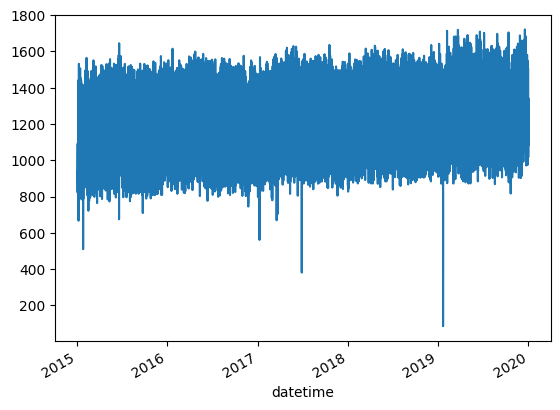

In [ ]:
 df['nat_demand'].plot()

In [ ]:
def make_lags(df, lags):
    ret_df = pd.concat({f'lag_{i}_':df.shift(i) for i in range(1,lags+1)},axis=1)
    columns = [''.join(col).strip() for col in ret_df.columns.values]
    ret_df.columns = columns
    return ret_df

In [ ]:
df.columns

Index(['nat_demand', 'T2M_toc', 'QV2M_toc', 'TQL_toc', 'W2M_toc', 'T2M_san',
       'QV2M_san', 'TQL_san', 'W2M_san', 'T2M_dav', 'QV2M_dav', 'TQL_dav',
       'W2M_dav', 'Holiday_ID', 'holiday', 'school'],
      dtype='object')

## Feature Selection

In [ ]:
import pandas as pd

# Assuming you have a DataFrame 'df' with your data
threshold = 0.5  # Set your desired correlation threshold

# Calculate the correlation of features with 'nat_demand'
correlation_with_target = df.corr()['nat_demand'].abs()

# Create a mask for features to keep (True) or remove (False)
mask = (correlation_with_target >= threshold) | (correlation_with_target.isna())

# Apply the mask to your DataFrame
df_filtered = df.loc[:, mask]

In this, we keep only the features with a correlation coefficient(Absolutive so it counts negative correlatiob also) greater than or equal to the specified threshold.

In [ ]:
df

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
datetime,,,,,,,,,,,,,,,,
2015-03-01 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
2015-03-01 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2015-03-01 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
2015-03-01 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
2015-03-01 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,1301.6065,26.635645,0.018421,0.013165,13.184052,25.135645,0.018048,0.064240,3.086798,23.620020,0.016697,0.073425,3.865351,22,1,0
2019-12-31 20:00:00,1250.9634,26.495935,0.018162,0.014713,13.443892,24.769373,0.017781,0.058838,3.659980,23.284998,0.016606,0.064362,4.171572,22,1,0
2019-12-31 21:00:00,1193.6802,26.354456,0.017980,0.013836,13.442195,24.479456,0.017606,0.038086,3.769294,23.041956,0.016492,0.054260,4.045283,22,1,0


In [ ]:
df_filtered

,nat_demand,T2M_toc,T2M_san,T2M_dav
datetime,,,,
2015-03-01 01:00:00,970.3450,25.865259,23.482446,22.662134
2015-03-01 02:00:00,912.1755,25.899255,23.399255,22.578943
2015-03-01 03:00:00,900.2688,25.937280,23.343530,22.531030
2015-03-01 04:00:00,889.9538,25.957544,23.238794,22.512231
2015-03-01 05:00:00,893.6865,25.973840,23.075403,22.481653
...,...,...,...,...
2019-12-31 19:00:00,1301.6065,26.635645,25.135645,23.620020
2019-12-31 20:00:00,1250.9634,26.495935,24.769373,23.284998
2019-12-31 21:00:00,1193.6802,26.354456,24.479456,23.041956


In [ ]:
X = df_filtered.loc[:, df_filtered.columns != 'nat_demand']
y = df_filtered['nat_demand']

In [ ]:
# X_train = np.array(X_train).reshape(-1, 1)
# y_train = np.array(y_train)  # Convert y_train to a NumPy array
# X_test = np.array(X_test).reshape(-1, 1)
# y_test = np.array(y_test)  # Convert y_test to a NumPy array

In [ ]:
X

,T2M_toc,T2M_san,T2M_dav
datetime,,,
2015-03-01 01:00:00,25.865259,23.482446,22.662134
2015-03-01 02:00:00,25.899255,23.399255,22.578943
2015-03-01 03:00:00,25.937280,23.343530,22.531030
2015-03-01 04:00:00,25.957544,23.238794,22.512231
2015-03-01 05:00:00,25.973840,23.075403,22.481653
...,...,...,...
2019-12-31 19:00:00,26.635645,25.135645,23.620020
2019-12-31 20:00:00,26.495935,24.769373,23.284998
2019-12-31 21:00:00,26.354456,24.479456,23.041956


In [ ]:
X0 = make_lags(X.iloc[:,:], lags=2)

In [ ]:
X0

,lag_1_T2M_toc,lag_1_T2M_san,lag_1_T2M_dav,lag_2_T2M_toc,lag_2_T2M_san,lag_2_T2M_dav
datetime,,,,,,
2015-03-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-01 02:00:00,25.865259,23.482446,22.662134,NaN,NaN,NaN
2015-03-01 03:00:00,25.899255,23.399255,22.578943,25.865259,23.482446,22.662134
2015-03-01 04:00:00,25.937280,23.343530,22.531030,25.899255,23.399255,22.578943
2015-03-01 05:00:00,25.957544,23.238794,22.512231,25.937280,23.343530,22.531030
...,...,...,...,...,...,...
2019-12-31 19:00:00,26.999292,25.733667,24.132104,28.112024,26.893274,24.916711
2019-12-31 20:00:00,26.635645,25.135645,23.620020,26.999292,25.733667,24.132104
2019-12-31 21:00:00,26.495935,24.769373,23.284998,26.635645,25.135645,23.620020


In [ ]:
X = pd.concat([X.iloc[:,0:], X0], axis=1)

In [ ]:
Xx = X.copy()

In [ ]:
X

,T2M_toc,T2M_san,T2M_dav,lag_1_T2M_toc,lag_1_T2M_san,lag_1_T2M_dav,lag_2_T2M_toc,lag_2_T2M_san,lag_2_T2M_dav
datetime,,,,,,,,,
2015-03-01 01:00:00,25.865259,23.482446,22.662134,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-01 02:00:00,25.899255,23.399255,22.578943,25.865259,23.482446,22.662134,NaN,NaN,NaN
2015-03-01 03:00:00,25.937280,23.343530,22.531030,25.899255,23.399255,22.578943,25.865259,23.482446,22.662134
2015-03-01 04:00:00,25.957544,23.238794,22.512231,25.937280,23.343530,22.531030,25.899255,23.399255,22.578943
2015-03-01 05:00:00,25.973840,23.075403,22.481653,25.957544,23.238794,22.512231,25.937280,23.343530,22.531030
...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,26.635645,25.135645,23.620020,26.999292,25.733667,24.132104,28.112024,26.893274,24.916711
2019-12-31 20:00:00,26.495935,24.769373,23.284998,26.635645,25.135645,23.620020,26.999292,25.733667,24.132104
2019-12-31 21:00:00,26.354456,24.479456,23.041956,26.495935,24.769373,23.284998,26.635645,25.135645,23.620020


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43775 entries, 2015-03-01 01:00:00 to 2019-12-31 23:00:00
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   T2M_toc        43775 non-null  float64
 1   T2M_san        43775 non-null  float64
 2   T2M_dav        43775 non-null  float64
 3   lag_1_T2M_toc  43774 non-null  float64
 4   lag_1_T2M_san  43774 non-null  float64
 5   lag_1_T2M_dav  43774 non-null  float64
 6   lag_2_T2M_toc  43773 non-null  float64
 7   lag_2_T2M_san  43773 non-null  float64
 8   lag_2_T2M_dav  43773 non-null  float64
dtypes: float64(9)
memory usage: 4.3 MB


In [ ]:
y

datetime
2015-03-01 01:00:00     970.3450
2015-03-01 02:00:00     912.1755
2015-03-01 03:00:00     900.2688
2015-03-01 04:00:00     889.9538
2015-03-01 05:00:00     893.6865
                         ...    
2019-12-31 19:00:00    1301.6065
2019-12-31 20:00:00    1250.9634
2019-12-31 21:00:00    1193.6802
2019-12-31 22:00:00    1130.4575
2019-12-31 23:00:00    1084.4737
Name: nat_demand, Length: 43775, dtype: float64

In [ ]:
X.dropna(inplace=True)
y, X = y.align(X, join='inner')
X = np.asarray(X).astype('float32')

In [ ]:
X.shape, y.shape

((43773, 9), (43773,))

## Splitting dataset

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,shuffle=False)

## Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [ ]:
X_train.shape, y_train.shape

((35018, 9), (35018,))

In [ ]:
# # Reshape data to match model input requirements
# X_train = np.array(X_train).reshape(-1, 1)
# y_train = np.array(y_train)  # Convert y_train to a NumPy array
# X_test = np.array(X_test).reshape(-1, 1)
# y_test = np.array(y_test)  # Convert y_test to a NumPy array

## Model Selection

In [ ]:
    #Checking which degree is working best
degree = [2,3,4,5]
for i in degree:
  poly = PolynomialFeatures(i)
  new_x = poly.fit_transform(X_train)

  model = LinearRegression()
  model.fit(new_x, y_train)

  new_x = poly.fit_transform(X_test)

  y_pred = pd.Series(model.predict(new_x))
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  print(f"RMSE for degree {i} is", rmse)

RMSE for degree 2 is 141.24272565501363
RMSE for degree 3 is 148.32982052076815
RMSE for degree 4 is 138.30065491038113
RMSE for degree 5 is 148.74826423043328


In [ ]:
# Create and train Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Create and train Polynomial Regression models with different degrees
poly_degrees = [4]   # Change degree which works best
poly_reg_models = []


for degree in poly_degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(X_train_poly, y_train)

    poly_reg_models.append((degree, poly_reg_model))

# Create and train an Artificial Neural Network (ANN) model
ann_model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(9,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)  # Output layer
])

# Compile the ANN model
ann_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the ANN model
ann_model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2)


Epoch 1/40
876/876 [==============================] - 3s 3ms/step - loss: 209721.8594 - val_loss: 21218.4922
Epoch 2/40
876/876 [==============================] - 2s 3ms/step - loss: 16871.1797 - val_loss: 18001.6797
Epoch 3/40
876/876 [==============================] - 3s 3ms/step - loss: 16251.5732 - val_loss: 18242.0645
Epoch 4/40
876/876 [==============================] - 2s 2ms/step - loss: 15881.6230 - val_loss: 15874.8711
Epoch 5/40
876/876 [==============================] - 2s 2ms/step - loss: 15592.6826 - val_loss: 14744.7490
Epoch 6/40
876/876 [==============================] - 2s 2ms/step - loss: 15588.8125 - val_loss: 19204.2480
Epoch 7/40
876/876 [==============================] - 2s 2ms/step - loss: 15451.8330 - val_loss: 14890.7461
Epoch 8/40
876/876 [==============================] - 2s 2ms/step - loss: 15377.7949 - val_loss: 14241.8467
Epoch 9/40
876/876 [==============================] - 3s 3ms/step - loss: 15273.3652 - val_loss: 19738.2891
Epoch 10/40
876/876 [======

In [ ]:
# Predictions for all models
linear_reg_preds = linear_reg_model.predict(X_test)
poly_reg_preds = [poly_reg_model.predict(poly_features.transform(X_test)) for _, poly_reg_model in poly_reg_models]
ann_preds = ann_model.predict(X_test)

274/274 [==============================] - 0s 1ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Function to calculate RMSE, MAE, and MSE
def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    return rmse, mae, mse

# Calculate metrics for Linear Regression
linear_reg_rmse, linear_reg_mae, linear_reg_mse = calculate_metrics(y_test, linear_reg_preds)

# Calculate metrics for Polynomial Regression models
poly_reg_metrics = []
for degree, poly_reg_model in poly_reg_models:
    poly_reg_preds = poly_reg_model.predict(poly_features.transform(X_test))
    rmse, mae, mse = calculate_metrics(y_test, poly_reg_preds)
    poly_reg_metrics.append((degree, rmse, mae, mse))

# Calculate metrics for ANN
ann_rmse, ann_mae, ann_mse = calculate_metrics(y_test, ann_preds)

# Print and compare metrics
print(f"Linear Regression - RMSE: {linear_reg_rmse}, MAE: {linear_reg_mae}, MSE: {linear_reg_mse}")

for degree, rmse, mae, mse in poly_reg_metrics:
    print(f"Polynomial Regression (Degree {degree}) - RMSE: {rmse}, MAE: {mae}, MSE: {mse}")

print(f"ANN - RMSE: {ann_rmse}, MAE: {ann_mae}, MSE: {ann_mse}")

Linear Regression - RMSE: 146.6986571506399, MAE: 118.55872228666209, MSE: 21520.496009800987
Polynomial Regression (Degree 4) - RMSE: 138.30065491038113, MAE: 110.17540567291904, MSE: 19127.071148640323
ANN - RMSE: 132.0439735506955, MAE: 107.29326549309992, MSE: 17435.610951056773


After adding two more layer and increasing nodes in ANN I found that ANN is performing better than Polynomial regression. Initially I found that Polynomial with degree 4 works best.

Challenge - I am facing challenge while plotting time series graphs. I tried by different methods but not  getting better visualization.

In [ ]:
# fig, ax = plt.subplots(figsize=(15, 5))
# fig.autofmt_xdate()
# plt.plot(X_test, y_test,
#          color='darkgray', alpha=0.8, label='Original')
# # plt.plot(linear_reg_preds, label='Training prediction')
# plt.plot(X_test, linear_reg_preds, label='Testing prediction')
# plt.legend()
# # ax.set_xticks([i for i in list(elec_df['datetime'])[::1000]])
# # plt.xticks(rotation=60)
# plt.show()